In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import numpy,pandas
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Reading & understanding data

In [2]:
advert_df = pd.read_csv("advertising.csv")
advert_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advert_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
advert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advert_df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
advert_df.shape

(200, 4)

In [7]:
advert_df.isna().sum()*100/advert_df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

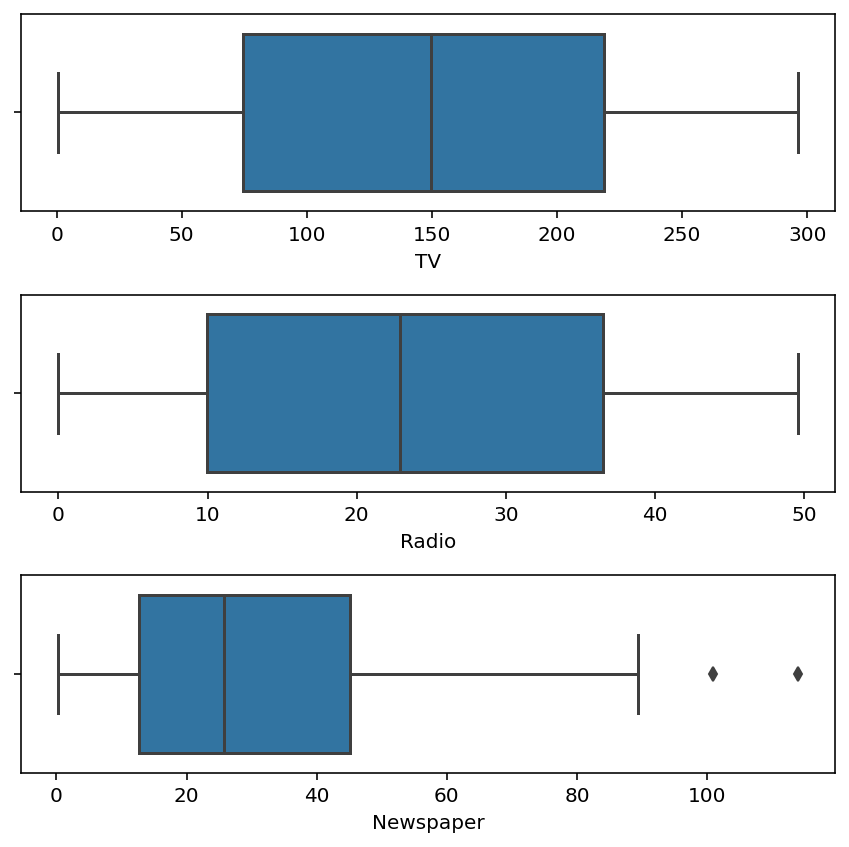

In [8]:
# Outlier Analysis
fig,axs = plt.subplots(3, figsize=(6,6))
sns.boxplot(advert_df['TV'], ax=axs[0])
sns.boxplot(advert_df['Radio'], ax=axs[1])
sns.boxplot(advert_df['Newspaper'], ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Sales'>

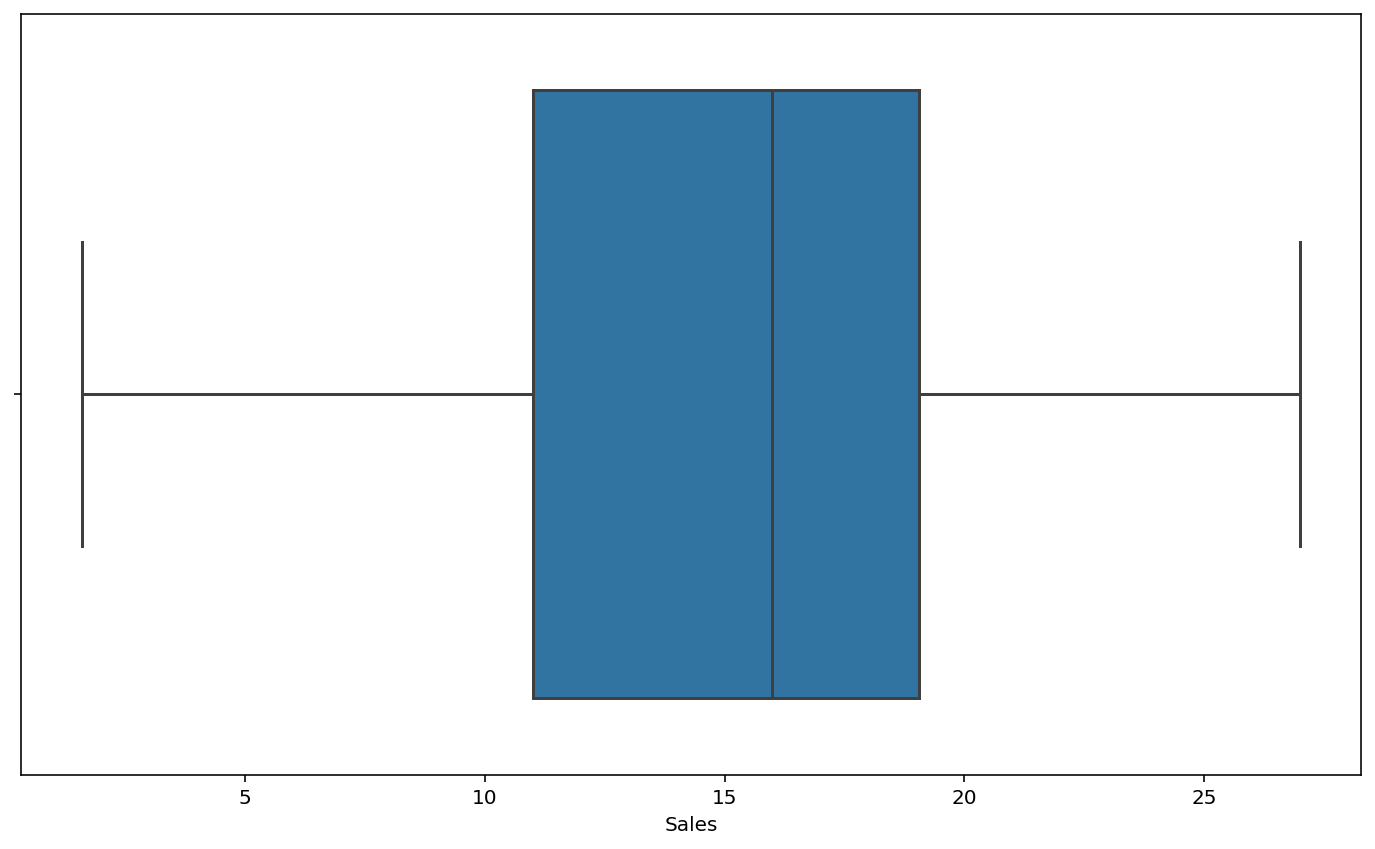

In [9]:
# Univariate Analysis of Taret variable
sns.boxplot(advert_df['Sales'])


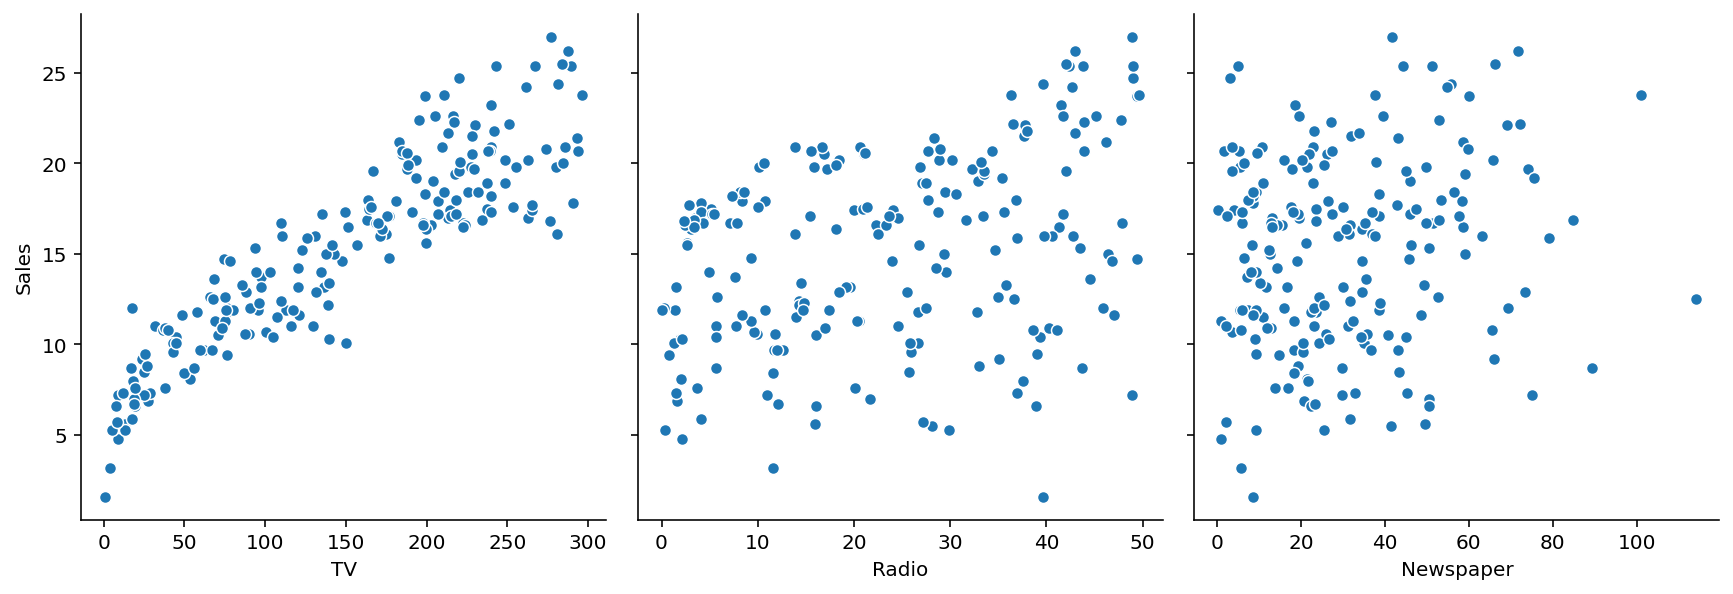

In [10]:
# Lets see relation of Sales variable with other independent variables
sns.pairplot(advert_df, y_vars= 'Sales', x_vars=['TV','Radio','Newspaper'], height=4, aspect=1,kind='scatter')

<AxesSubplot:>

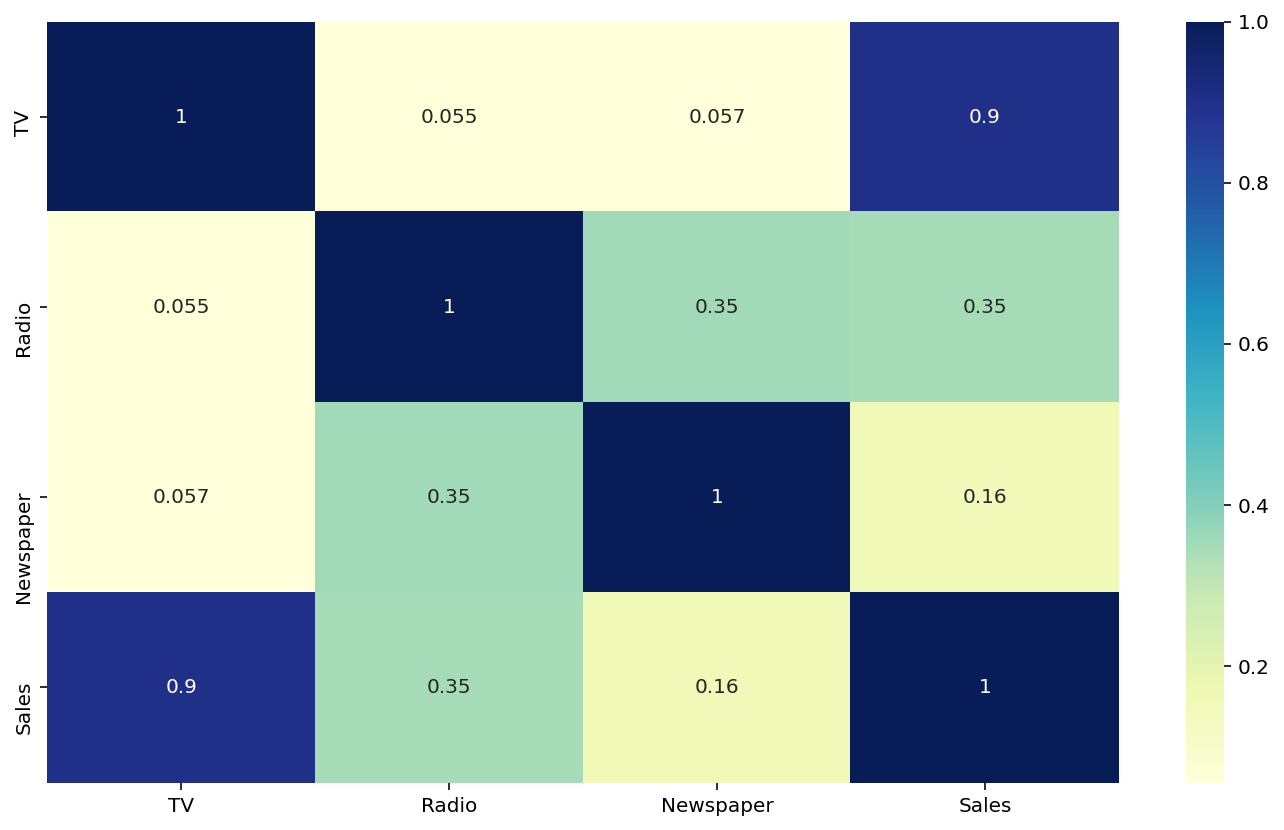

In [11]:
# Lets see the correlation between different variables
sns.heatmap(advert_df.corr(),cmap='YlGnBu', annot=True)

### Model building

In [12]:
dep_var = 'Sales'
cond = np.random.rand(len(advert_df))>.2
train = np.where(cond)[0]
test = np.where(~cond)[0]
len(train),len(test)

(159, 41)

In [13]:
df_train = advert_df.iloc[train]
df_test = advert_df.iloc[test]

In [14]:
x_train = df_train['TV']
x_test = df_test['TV']
y_train = df_train['Sales']
y_test = df_test['Sales']

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159,), (41,), (159,), (41,))

In [16]:
x_train.tail()

192     17.2
193    166.8
196     94.2
197    177.0
199    232.1
Name: TV, dtype: float64

In [17]:
y_train.tail()

192     5.9
193    19.6
196    14.0
197    14.8
199    18.4
Name: Sales, dtype: float64

In [19]:
import statsmodels.api as sm

In [20]:
# Add constrain to get an intercept
x_train_sm = sm.add_constant(x_train)

#Fit the regression line using OLS
lr = sm.OLS(y_train,x_train_sm).fit()

In [23]:
lr.params

const    6.952485
TV       0.056261
dtype: float64

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     642.1
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.36e-57
Time:                        20:34:49   Log-Likelihood:                -358.74
No. Observations:                 159   AIC:                             721.5
Df Residuals:                     157   BIC:                             727.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9525      0.377     18.449      0.0

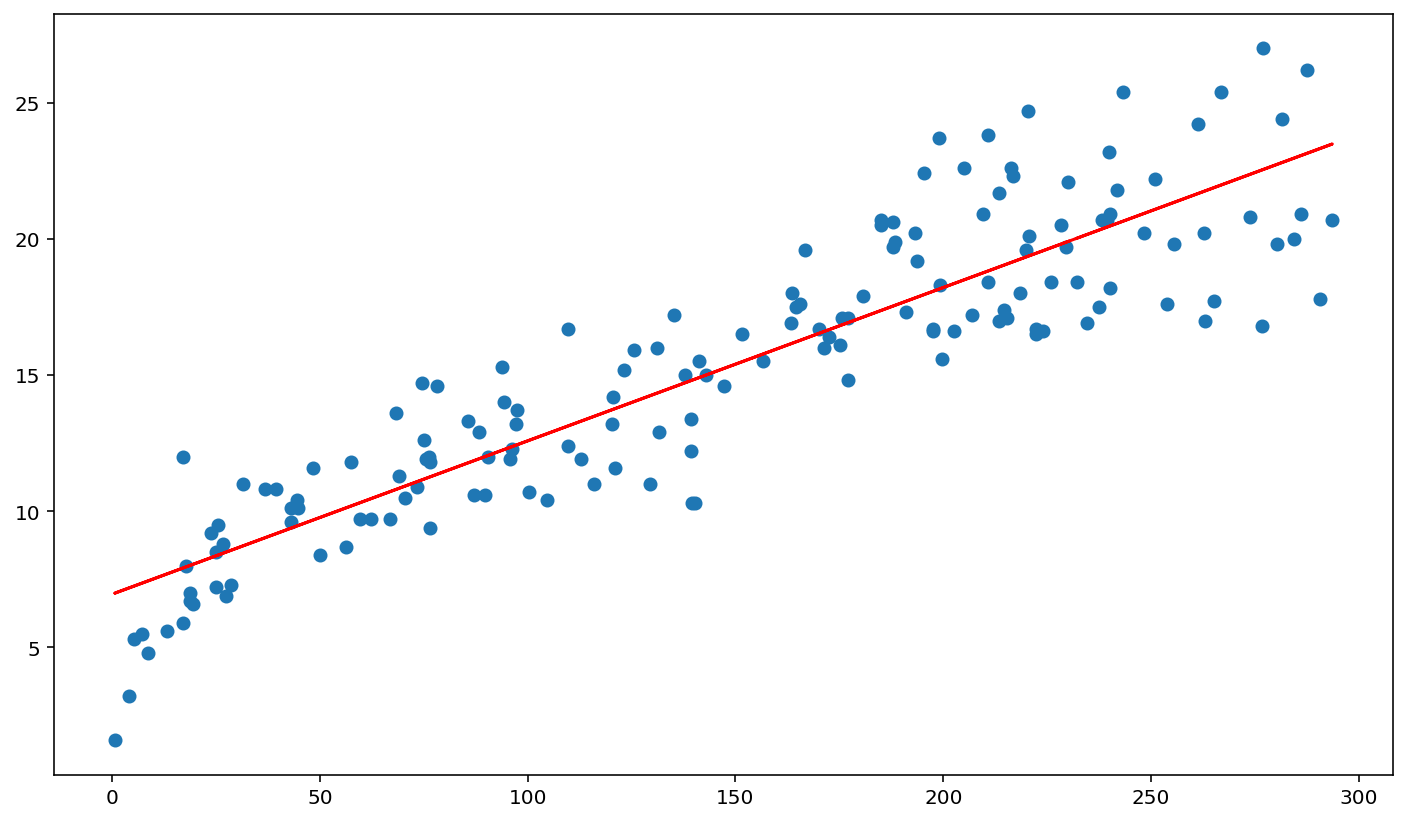

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9525+ 0.0563*x_train, 'r')
plt.show()

In [31]:
y_train_pred = lr.predict(x_train_sm)
res = y_train- y_train_pred

Text(0.5, 0, 'y_train - y_train_predicted')

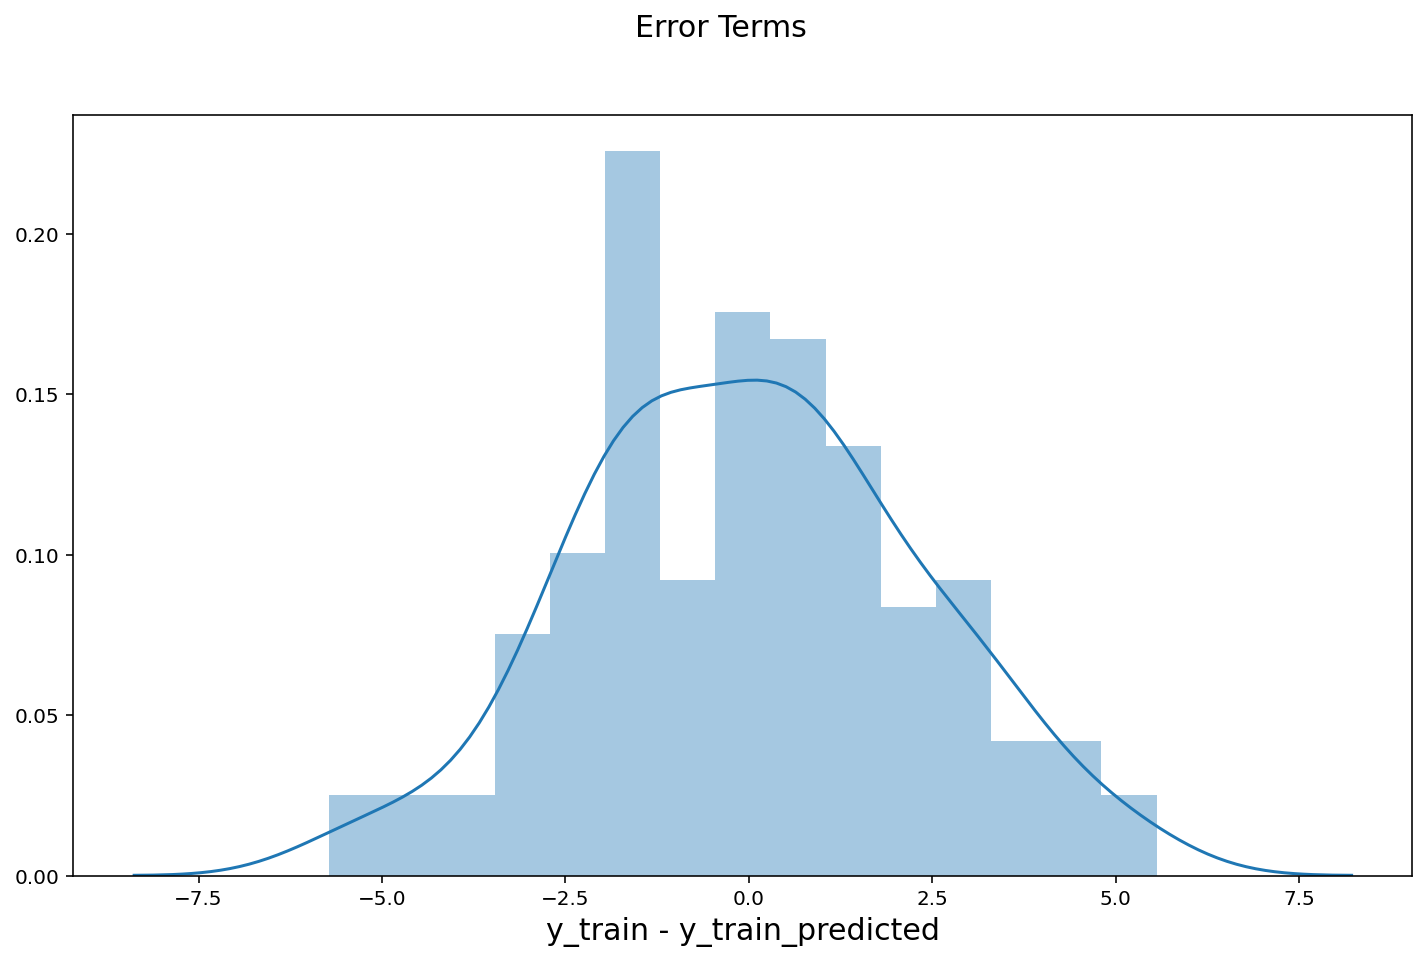

In [33]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize= 15)
plt.xlabel('y_train - y_train_predicted', fontsize=15)

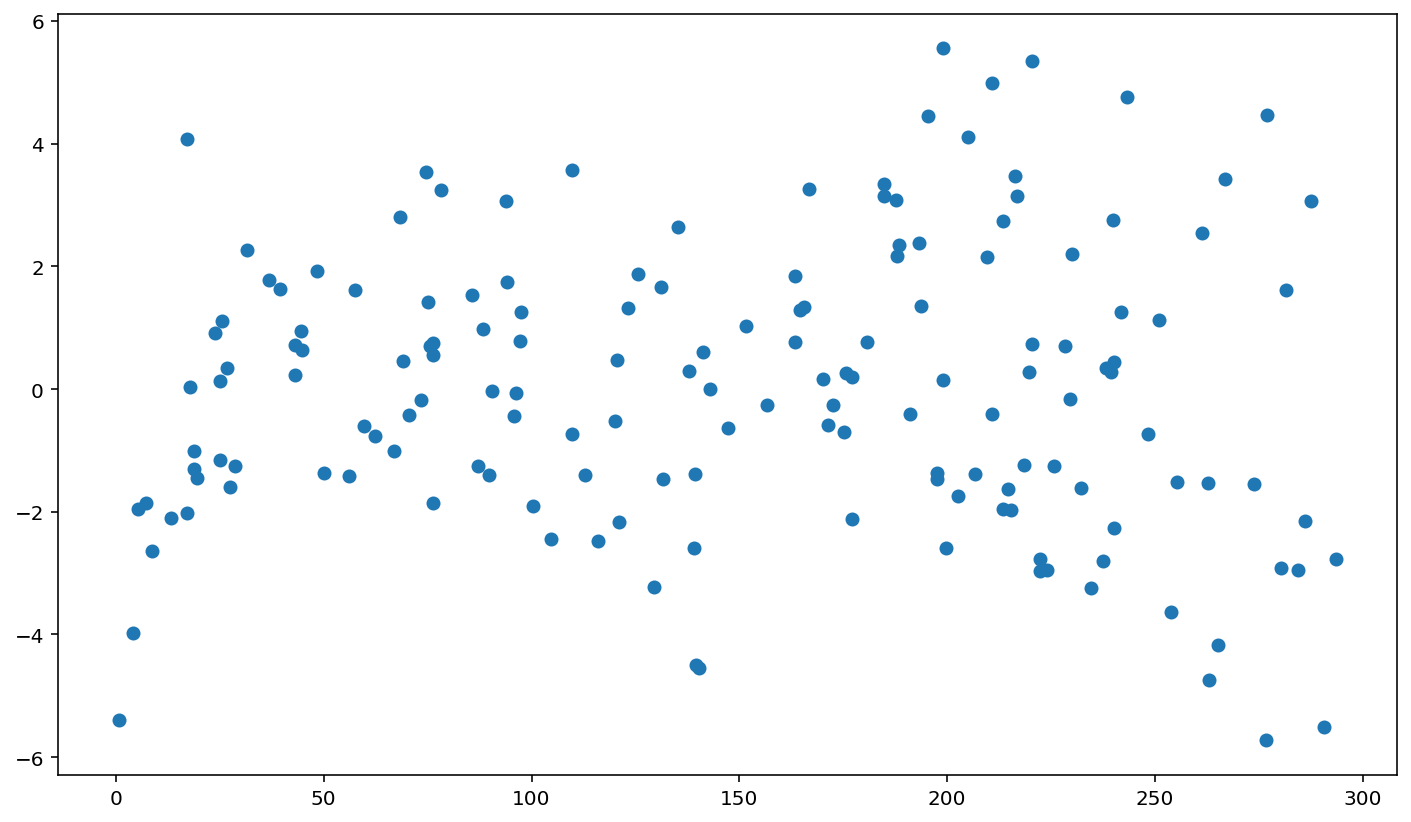

In [34]:
plt.scatter(x_train,res)

In [35]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(y_pred,y_test))

2.1963885398421987

In [39]:
r2_square = r2_score(y_test,y_pred)
r2_square

0.8378169548508178

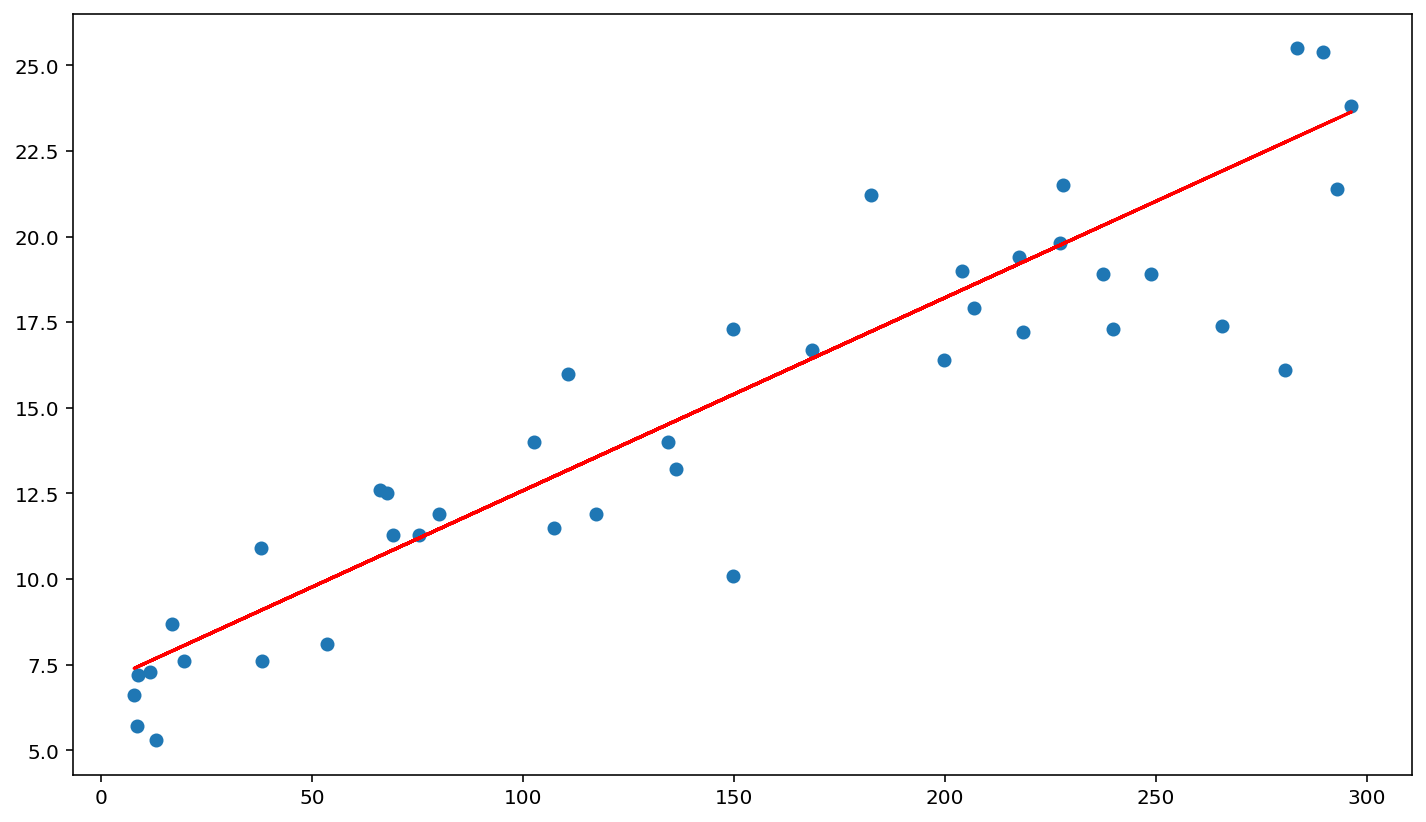

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9525+ 0.0563*x_test, 'r')